In [ ]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv('C:/data_science/janatahack/train.csv')
test=pd.read_csv('C:/data_science/janatahack/test.csv')

In [3]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [4]:
train.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,1.000000,0.029309,0.023360,0.035009,-0.025129,0.017725,-0.029347,-0.011643,-0.019846,-0.004922,...,0.038737,0.015078,0.015758,0.007428,0.004978,0.043774,0.012707,0.003834,0.001453,-0.016701
LIMIT_BAL,0.029309,1.000000,0.029683,-0.216762,-0.110451,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,...,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
SEX,0.023360,0.029683,1.000000,0.011012,-0.033930,-0.092907,-0.061232,-0.072602,-0.064406,-0.061242,...,-0.017430,-0.014278,-0.013546,0.003907,0.000398,-0.003920,0.000042,0.002165,0.003759,-0.037634
EDUCATION,0.035009,-0.216762,0.011012,1.000000,-0.143085,0.172253,0.105815,0.119132,0.110223,0.103607,...,0.002318,-0.005243,-0.006436,-0.042164,-0.032573,-0.045854,-0.041620,-0.035620,-0.031098,0.021347
MARRIAGE,-0.025129,-0.110451,-0.033930,-0.143085,1.000000,-0.414239,0.029420,0.032403,0.043988,0.042245,...,-0.024648,-0.026143,-0.020930,-0.002227,-0.006634,0.000018,-0.014061,-0.003375,-0.005555,-0.016888
AGE,0.017725,0.143206,-0.092907,0.172253,-0.414239,1.000000,-0.043313,-0.055090,-0.058891,-0.057324,...,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
PAY_0,-0.029347,-0.272059,-0.061232,0.105815,0.029420,-0.043313,1.000000,0.669158,0.573421,0.540895,...,0.175132,0.176809,0.172138,-0.085340,-0.070403,-0.079509,-0.065830,-0.061725,-0.065042,0.325851
PAY_2,-0.011643,-0.297323,-0.072602,0.119132,0.032403,-0.055090,0.669158,1.000000,0.768036,0.662055,...,0.218108,0.217404,0.215069,-0.083156,-0.060032,-0.064262,-0.051836,-0.041990,-0.042252,0.263546
PAY_3,-0.019846,-0.290059,-0.064406,0.110223,0.043988,-0.058891,0.573421,0.768036,1.000000,0.780378,...,0.224166,0.222599,0.220174,-0.004458,-0.063249,-0.058944,-0.050562,-0.034179,-0.039050,0.235930
PAY_4,-0.004922,-0.269652,-0.061242,0.103607,0.042245,-0.057324,0.540895,0.662055,0.780378,1.000000,...,0.242503,0.240128,0.236392,-0.014070,-0.001616,-0.073125,-0.046960,-0.032112,-0.031699,0.220079


In [5]:
train.shape

(21000, 25)

In [6]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [7]:
train.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [8]:
train_x=train.drop(['ID','default_payment_next_month'],axis=1)
train_x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,2,1,2,46,2,2,-2,-1,0,...,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,2,2,1,41,0,0,0,0,0,...,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,-1,0,0,0,0,...,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


In [9]:
train_y=train['default_payment_next_month']

In [10]:
train.drop('ID',axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,2,1,2,46,2,2,-2,-1,0,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,2,2,1,41,0,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,80000,1,3,1,52,-1,0,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
5,150000,2,1,2,29,-2,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
6,260000,2,1,1,36,0,0,0,0,0,...,90857,-81334,142645,5000,6000,5020,81569,331788,10002,0
7,50000,2,2,1,31,0,0,0,0,0,...,15993,15780,15549,2000,1223,1000,1000,1000,1000,0
8,130000,2,2,2,24,0,0,0,0,0,...,109428,90359,89216,4155,5802,3487,2908,3013,3093,0
9,60000,2,3,2,28,-1,-1,0,0,0,...,42984,38495,39038,87804,2000,1567,1320,1500,2000,0


In [11]:
x_train, x_validat, y_train, y_validat = train_test_split(train_x,train_y, random_state = 0)

# Decision Tree Algorithm

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
decisiontree=DecisionTreeClassifier(max_depth=6,criterion='gini').fit(x_train,y_train)

In [14]:
predict=decisiontree.predict(x_validat)
probs=decisiontree.predict_proba(x_validat)[:,1]

In [15]:
cm=confusion_matrix(predict,y_validat)

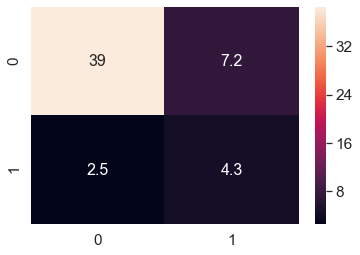

In [16]:
sns.set(font_scale=1.4) 
sns.heatmap(cm/100, annot=True, annot_kws={"size": 16})

plt.show()

In [17]:
fpr, tpr, thresholds = roc_curve(y_validat,probs)

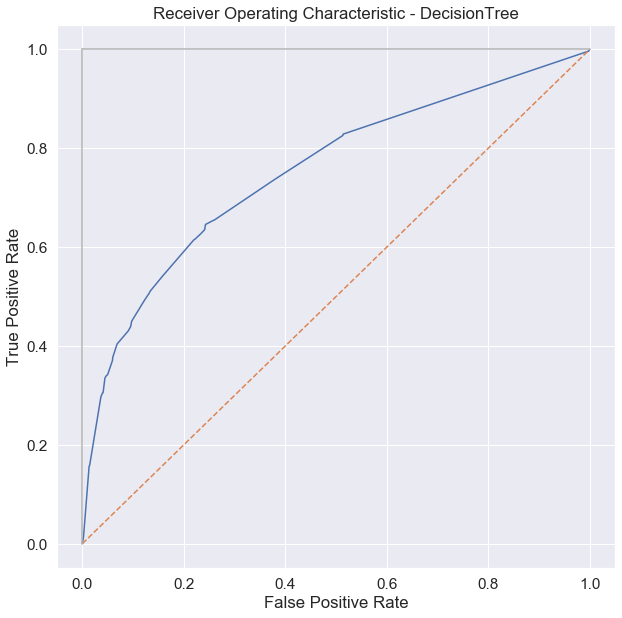

In [18]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
aucscore=roc_auc_score(y_validat, probs)
print(aucscore)

0.7532293276237153


#  Random Forest Classifier 

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='gini')
randommodel=randomclassifier.fit(x_train,y_train)
predict=randommodel.predict(x_validat)
probs=randommodel.predict_proba(x_validat)[:,1]
cm=confusion_matrix(predict,y_validat)

In [22]:
cm

array([[3858,  712],
       [ 243,  437]], dtype=int64)

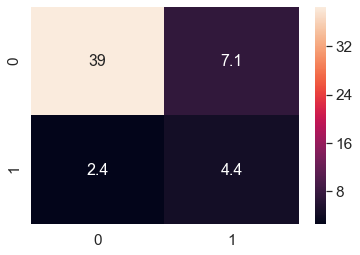

In [23]:
sns.set(font_scale=1.4) 
sns.heatmap(cm/100, annot=True, annot_kws={"size": 16})

plt.show()

In [24]:
fpr, tpr, thresholds = roc_curve(y_validat,probs)

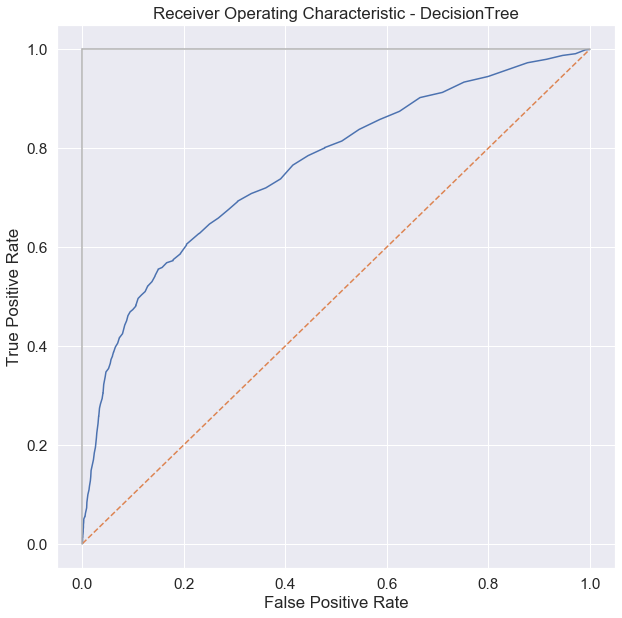

In [25]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
aucscore2=roc_auc_score(y_validat, probs)
print(aucscore2)

0.7607339185140054


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(solver='lbfgs',max_iter=300, multi_class='auto') 
logclass=classifier.fit(x_train, y_train) 
predict=logclass.predict(x_validat)
cm=confusion_matrix(predict,y_validat)
print(cm)

[[4100 1149]
 [   1    0]]


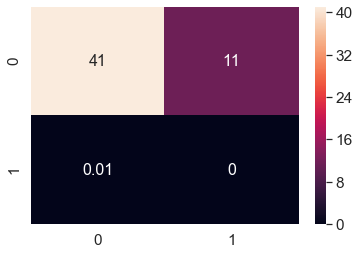

In [28]:
sns.set(font_scale=1.4) 
sns.heatmap(cm/100, annot=True, annot_kws={"size": 16})

plt.show()

In [29]:
fpr, tpr, thresholds = roc_curve(y_validat,probs)

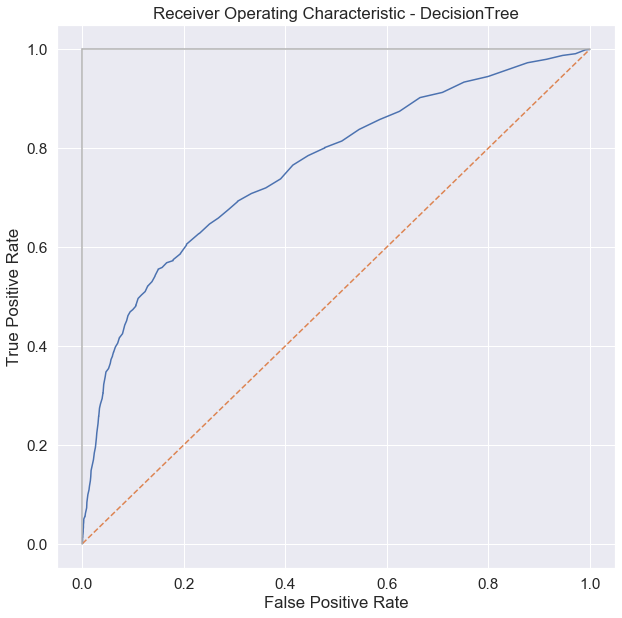

In [30]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
aucscore3=roc_auc_score(y_validat, probs)
print(aucscore3)

0.7607339185140054
